In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from numpy.fft import fft,fftshift
plt.rcParams.update({'font.size': 16})

In [2]:
%matplotlib notebook

In [3]:
peaks=[-7,-5,3,10]
A=[.5,1,.3,.8]

Artifact=.15+.1*1j

SW=30
dig_res=.1

<IPython.core.display.Javascript object>


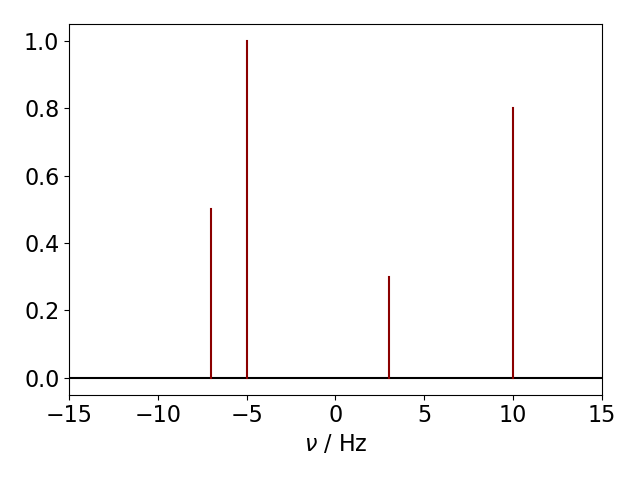

In [4]:
ax=plt.subplots()[1]
ax.plot([-SW/2,SW/2],[0,0],color='black')
for p,a in zip(peaks,A):
    ax.plot(np.ones(2)*p,[0,a],color='darkred')
ax.set_xlim([-SW/2,SW/2])
ax.set_xlabel(r'$\nu$ / Hz')
ax.figure.tight_layout()

# States-Haberkorn-Ruben

In [5]:
dt=1/SW
tf=1/dig_res
t=np.arange(tf/dt)*dt

I=np.zeros(t.shape,dtype=complex)
for p,a in zip(peaks,A):
    I+=a*(np.cos(2*np.pi*p*t)+1j*np.sin(2*np.pi*p*t))*np.exp(-4*t/tf)
I+=Artifact

<IPython.core.display.Javascript object>


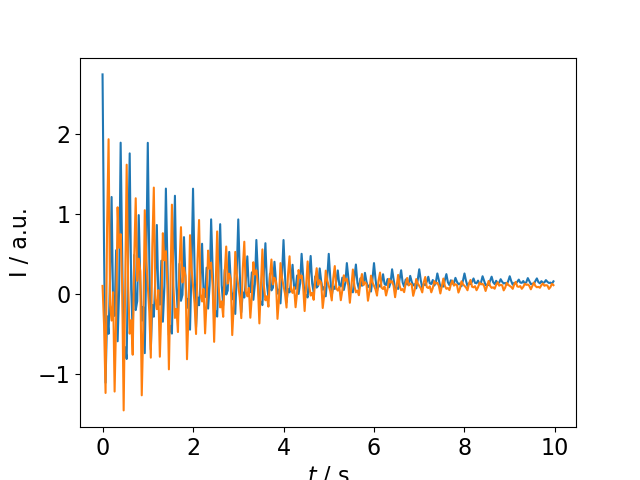

Text(0, 0.5, 'I / a.u.')

In [6]:
ax=plt.subplots()[1]
ax.plot(t,I.real)
ax.plot(t,I.imag)
ax.set_xlabel(r'$t$ / s')
ax.set_ylabel('I / a.u.')

<IPython.core.display.Javascript object>


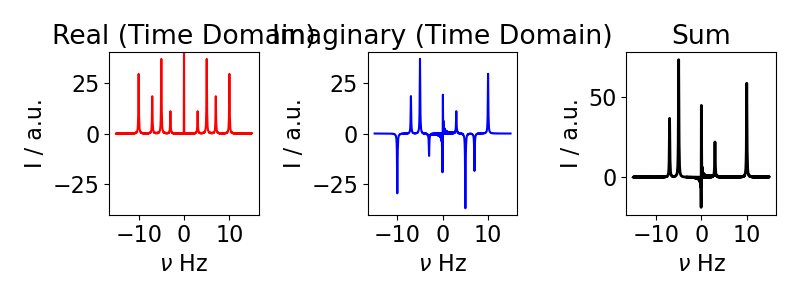

In [7]:
I0=copy(I)
I0[0]/=2
freq=1/(2*dt)*np.linspace(-1,1,I.size*2)
freq-=np.diff(freq[:2])/2

Sreal=fftshift(fft(I0.real,I.size*2))
Simag=fftshift(fft(1j*I0.imag,I.size*2))

fig,ax=plt.subplots(1,3)
ax[0].set_title('Real (Time Domain)')
ax[0].plot(freq,Sreal.real,color='red')
ax[0].set_ylim([-40,40])
ax[1].plot(freq,Simag.real,color='blue')
ax[1].set_title('Imaginary (Time Domain)')
ax[1].set_ylim([-40,40])
ax[2].plot(freq,Sreal.real+Simag.real,color='black',linewidth=2)
ax[2].set_title('Sum')
for a in ax:
    a.set_xlabel(r'$\nu$ Hz')
    a.set_ylabel('I / a.u.')
fig.set_size_inches([8,3])
fig.tight_layout()

# Time-Proportional Phase Incrementation

In [8]:
t=np.arange(tf/(dt/2))*(dt/2)

In [9]:
I=np.zeros(t.shape,dtype=complex)
for p,a in zip(peaks,A):
    I[0::4]+=a*np.cos(2*np.pi*p*t[0::4])*np.exp(-4*t[0::4]/tf)
    I[1::4]+=a*np.sin(2*np.pi*p*t[1::4])*np.exp(-4*t[1::4]/tf)
    I[2::4]+=-a*np.cos(2*np.pi*p*t[2::4])*np.exp(-4*t[2::4]/tf)
    I[3::4]+=-a*np.sin(2*np.pi*p*t[3::4])*np.exp(-4*t[3::4]/tf)
I+=Artifact

<IPython.core.display.Javascript object>


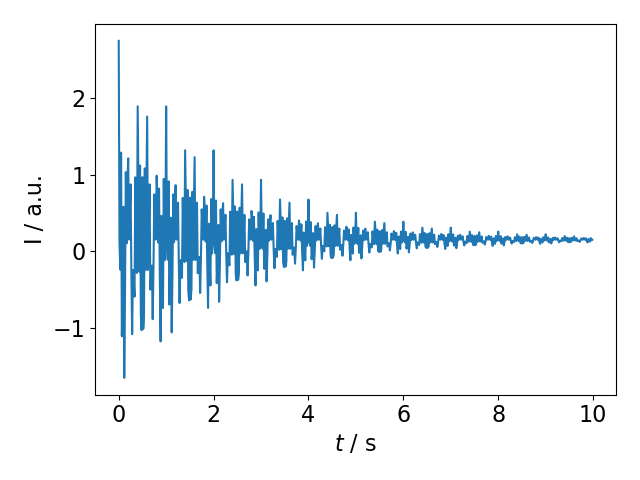

In [10]:
ax=plt.subplots()[1]
ax.plot(t,I.real)
ax.set_xlabel(r'$t$ / s')
ax.set_ylabel('I / a.u.')
ax.figure.tight_layout()

<IPython.core.display.Javascript object>


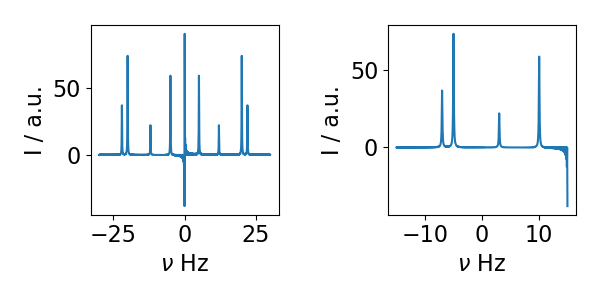

In [11]:
I0=copy(I)
I0[0]/=2
freq=1/(2*(dt/2))*np.linspace(-1,1,I.size*2)
freq+=np.diff(freq[:2])/2

S=fftshift(fft(I0,I.size*2))

fig,ax=plt.subplots(1,2)
ax[0].plot(freq,S.real)
ax[1].plot(freq[:len(S)//2]+SW/2,S[:len(S)//2].real)
for a in ax:
    a.set_xlabel(r'$\nu$ Hz')
    a.set_ylabel('I / a.u.')
fig.set_size_inches([6,3])
fig.tight_layout()

<IPython.core.display.Javascript object>


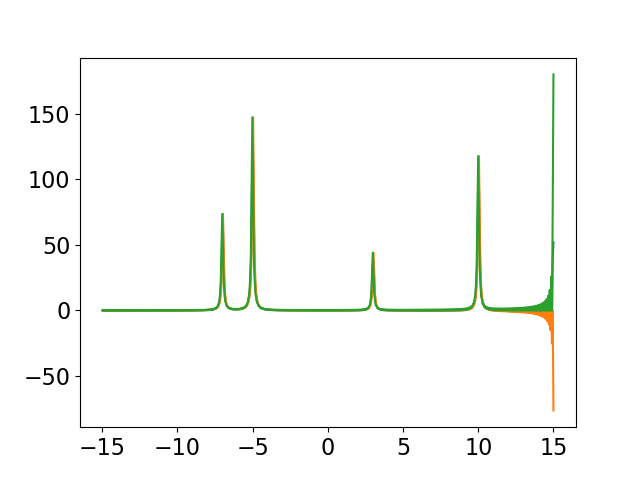

/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/albertsmith/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [14]:
fig,ax=plt.subplots()
ax.plot(freq[:len(S)//2]+SW/2,S[:len(S)//2]+S[::-1][:len(S)//2])
ax.plot(freq[:len(S)//2]+SW/2,S[:len(S)//2]*2)
ax.plot(freq[:len(S)//2]+SW/2,S[::-1][:len(S)//2]*2)

# States-TPPI

In [17]:
dt=1/SW
tf=1/dig_res
t=np.arange(tf/dt)*dt

I=np.zeros(t.shape,dtype=complex)
for p,a in zip(peaks,A):
    I[0::2]+=a*(np.cos(2*np.pi*p*t[0::2])+1j*np.sin(2*np.pi*p*t[0::2]))*np.exp(-4*t[0::2]/tf)
    I[1::2]+=-a*(np.cos(2*np.pi*p*t[1::2])+1j*np.sin(2*np.pi*p*t[1::2]))*np.exp(-4*t[0::2]/tf)
I+=Artifact

<IPython.core.display.Javascript object>


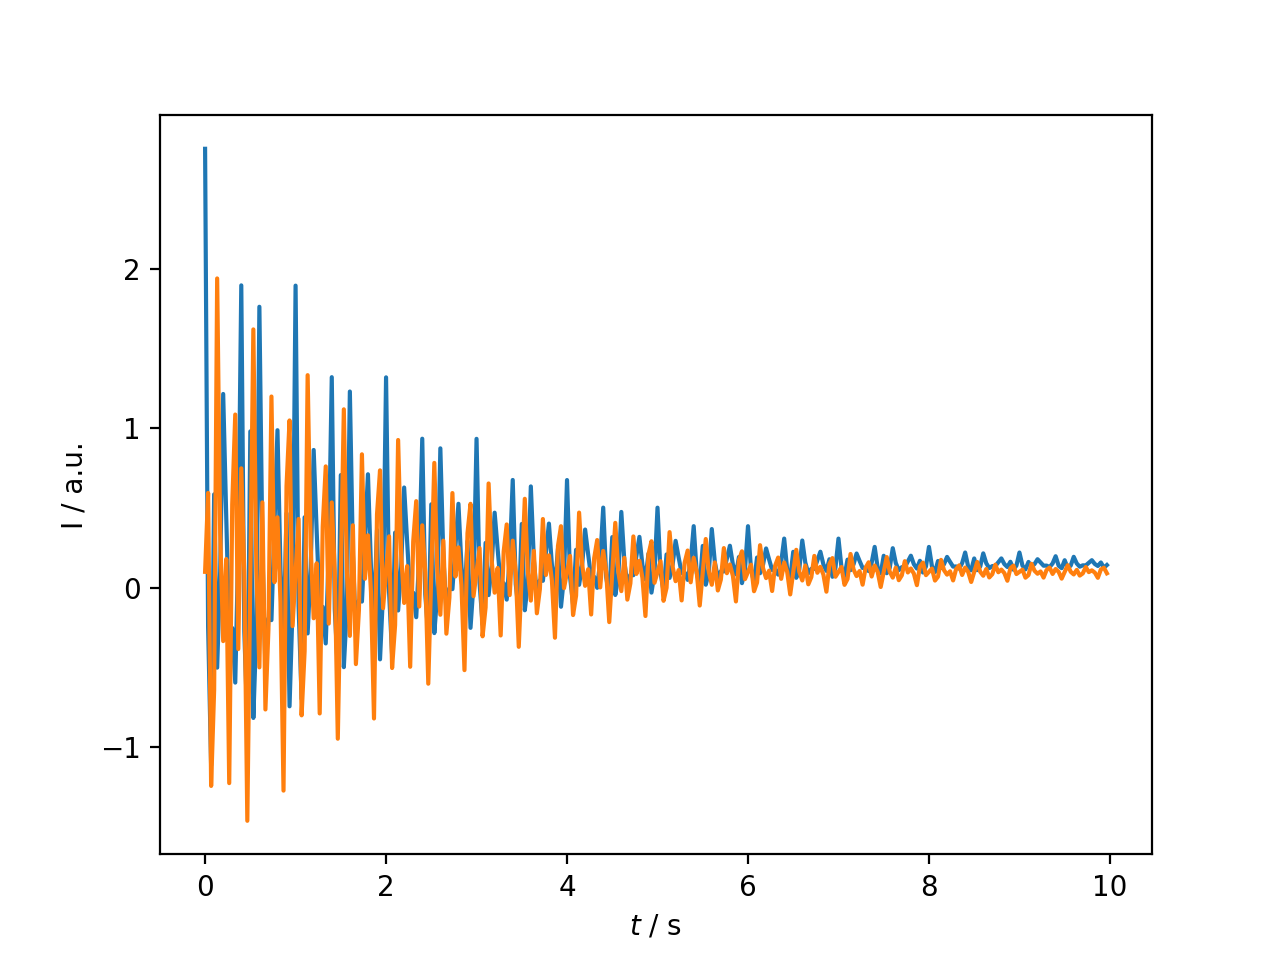

Text(0, 0.5, 'I / a.u.')

In [18]:
ax=plt.subplots()[1]
ax.plot(t,I.real)
ax.plot(t,I.imag)
ax.set_xlabel(r'$t$ / s')
ax.set_ylabel('I / a.u.')

<IPython.core.display.Javascript object>


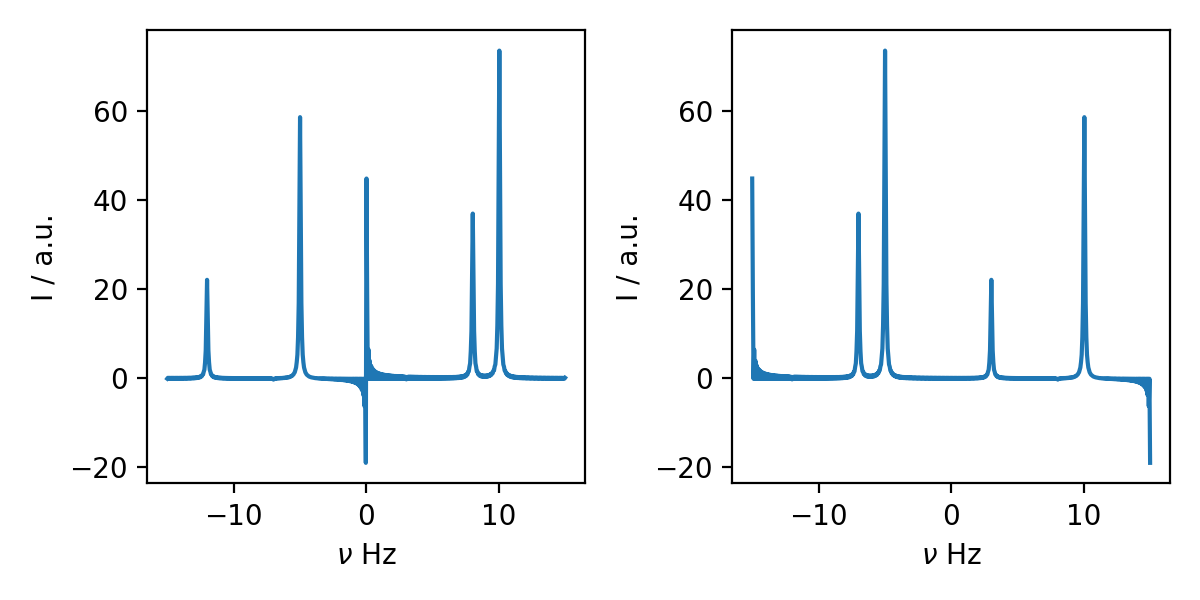

In [19]:
freq=1/(2*dt)*np.linspace(-1,1,I.size*2)

I0=copy(I)
I0[0]/=2

S=fftshift(fft(I0,I.size*2))
# Simag=fftshift(fft(1j*I0.imag,I.size*2))

fig,ax=plt.subplots(1,2)
ax[0].plot(freq,S.real)
# ax[0].plot(freq,Simag.real)
# ax[1].plot(freq,Sreal.real+Simag.real)
ax[1].plot(freq,fftshift(S.real))
for a in ax:
    a.set_xlabel(r'$\nu$ Hz')
    a.set_ylabel('I / a.u.')
fig.set_size_inches([6,3])
fig.tight_layout()